# PRODIGY INFOTECH

# **Task-04**

##### **Contribution**    - Individual
##### **Author**    - Allan Cheerakunnil Alex

Dataset - https://drive.google.com/file/d/1mTd7_T-TnvzZ_r5ju6H6E9hf_hzEZcU8/view?usp=drive_link

# **Let's Begin !**

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import nltk
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Dataset Loading

#### Dataset First View

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Personal Projects/Prodigy Tasks/Twitter Sentiment Analysis - 04/vaccination_tweets.csv')
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,NaN,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [ ]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [ ]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)

text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [ ]:
print(text_df['text'].iloc[0], "\n")
print(text_df['text'].iloc[1], "\n")
print(text_df['text'].iloc[2], "\n")
print(text_df['text'].iloc[3], "\n")
print(text_df['text'].iloc[4], "\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [ ]:
def data_processing(text):
  text = text.lower()
  text = re.sub(r"https\S+|www\S+https\S+", '', text, flags = re.MULTILINE)
  text = re.sub(r'\@w+|\#', '', text)
  text = re.sub(r'\^\w\s', '', text)
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

In [ ]:
text_df.text = text_df['text'].apply(data_processing)

In [ ]:
text_df = text_df.drop_duplicates('text')

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [ ]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))


In [ ]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,"world wrong side history year , hopefully , bi..."
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,"facts immutable , senator , even 're ethically..."
4,explain need vaccine @ borisjohnson @ matthanc...


In [ ]:
print(text_df['text'].iloc[0], "\n")
print(text_df['text'].iloc[1], "\n")
print(text_df['text'].iloc[2], "\n")
print(text_df['text'].iloc[3], "\n")
print(text_df['text'].iloc[4], "\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year , hopefully , biggest vaccination effort 've ev… 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 2-4 years… 

facts immutable , senator , even 're ethically sturdy enough acknowledge . ( 1 ) born i… 

explain need vaccine @ borisjohnson @ matthancock whereareallthesickpeople pfizerbiontech… 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10615 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10615 non-null  object
dtypes: object(1)
memory usage: 165.9+ KB


In [ ]:
def polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [ ]:
text_df.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,"world wrong side history year , hopefully , bi...",-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,"facts immutable , senator , even 're ethically...",0.100
4,explain need vaccine @ borisjohnson @ matthanc...,0.000
5,anyone useful advice/guidance whether covid va...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1. bidenharris winn...,0.675
8,covid vaccine ; getting ? covidvaccine covid19...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [ ]:
def sentiment(label):
  if label < 0:
    return "Negative"
  elif label == 0:
    return "Neutral"
  elif label > 0:
    return "Positive"

In [ ]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [ ]:
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,"world wrong side history year , hopefully , bi...",-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,"facts immutable , senator , even 're ethically...",0.1,Positive
4,explain need vaccine @ borisjohnson @ matthanc...,0.0,Neutral


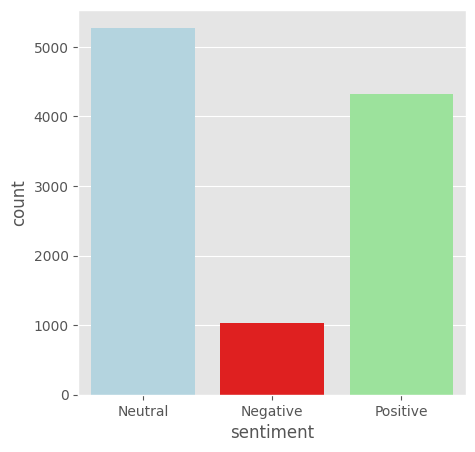

In [ ]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(x='sentiment', hue='sentiment', data=text_df, palette={'Positive': 'lightgreen', 'Negative': 'red', 'Neutral': 'lightblue'}, legend=False)
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

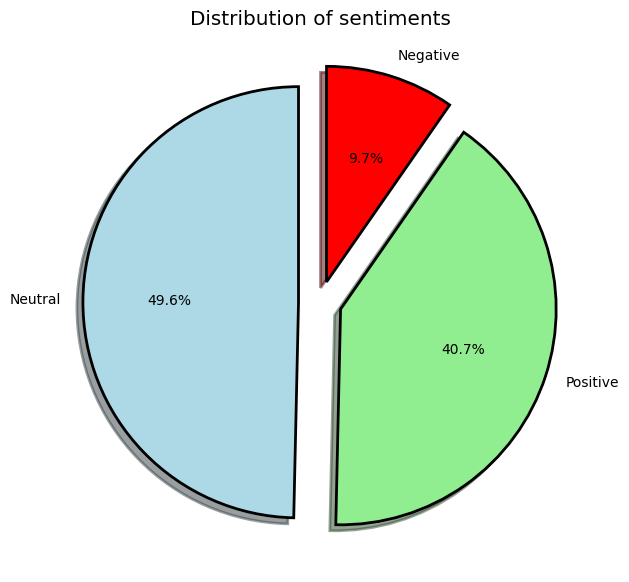

In [ ]:
fig = plt.figure(figsize = (7, 7))
colors = ("lightblue", "lightgreen", "red")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = text_df['sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, colors = colors,
          startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending = False)
pos_tweets.head()

,text,polarity,sentiment
6299,best shot ! 🖤 vaccinesavelives pfizerbiontech,1.0,Positive
2096,welcome move ! covid19 coronavirus pfizer pfiz...,1.0,Positive
8084,science wonderful covidvaccine astrazeneca pfi...,1.0,Positive
3238,igottheshot seconddose pfizerbiontech covidvac...,1.0,Positive
2752,well felt good ! ! joining ranks halfway covid...,1.0,Positive


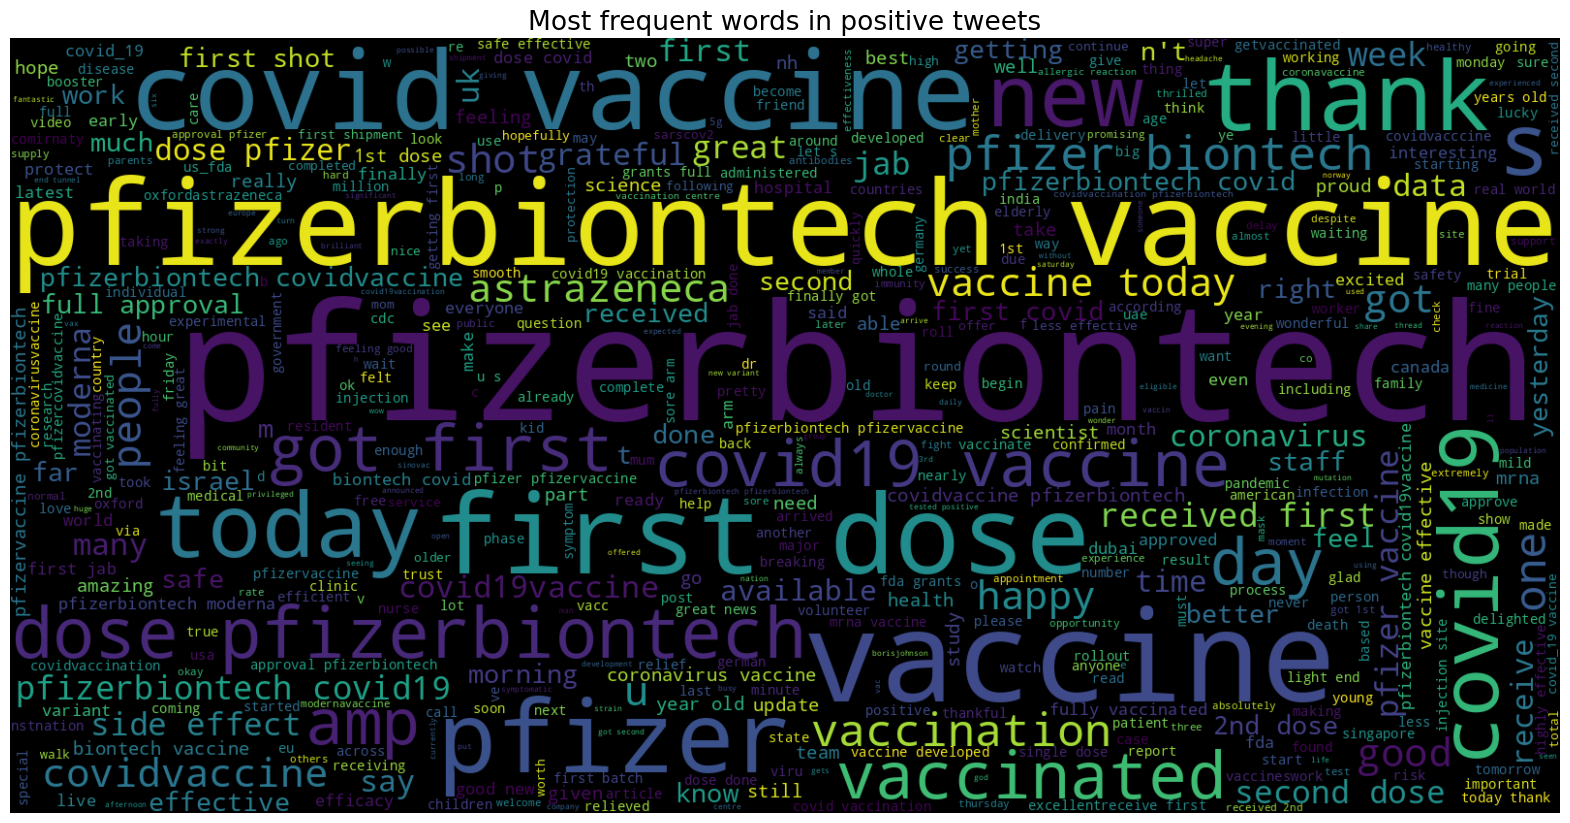

In [ ]:
# Assuming pos_tweets is your DataFrame or list containing positive tweets
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [ ]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending = False)
neg_tweets.head()

,text,polarity,sentiment
8172,make `` vaccination-center '' life much easier...,-0.004167,Negative
7715,"got first dose 💉 , less waiting time airport v...",-0.005556,Negative
7157,@ nas_k27 second dose due end next month well ...,-0.006250,Negative
2907,2015 worried absence mrna vaccine challenge wa...,-0.006250,Negative
1323,"chef , responsible customer 's death due food ...",-0.008333,Negative


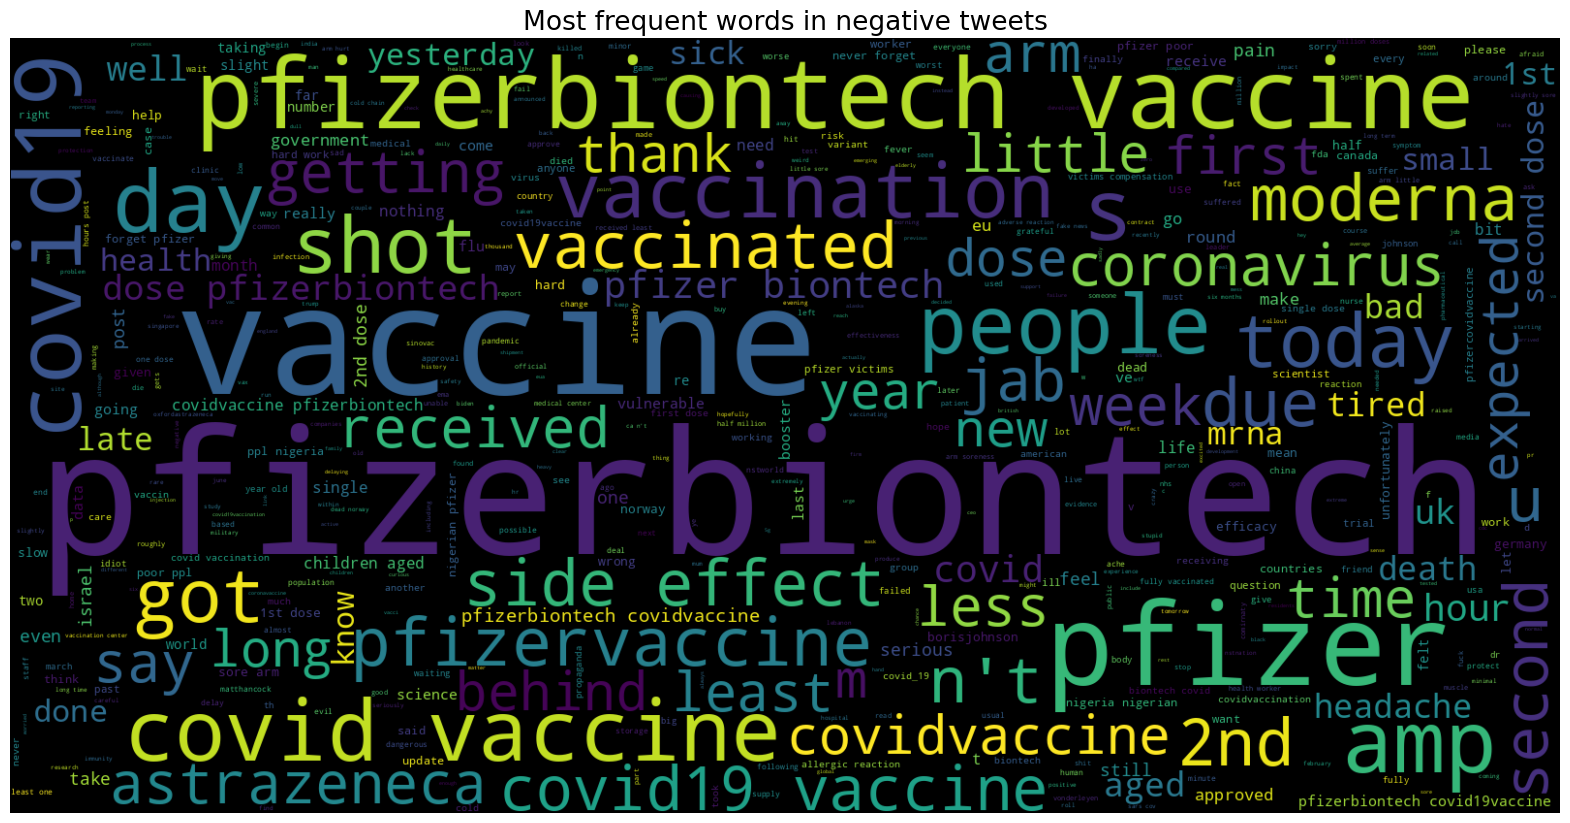

In [ ]:
# Assuming neg_tweets is your DataFrame or list containing negative tweets
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [ ]:
neu_tweets = text_df[text_df.sentiment == 'Neutral']
neu_tweets = neu_tweets.sort_values(['polarity'], ascending = False)
neu_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7527,@ neurophysik @ bharatbiotech @ seruminstindia...,0.0,Neutral
7523,"number covid-19 cases today , 31 mar 2021. rem...",0.0,Neutral
7521,completed vaccination.💉 thank lord . 🙌 🙏😇 pfiz...,0.0,Neutral
7519,second dose pfizerbiontech done dusted ! come ...,0.0,Neutral


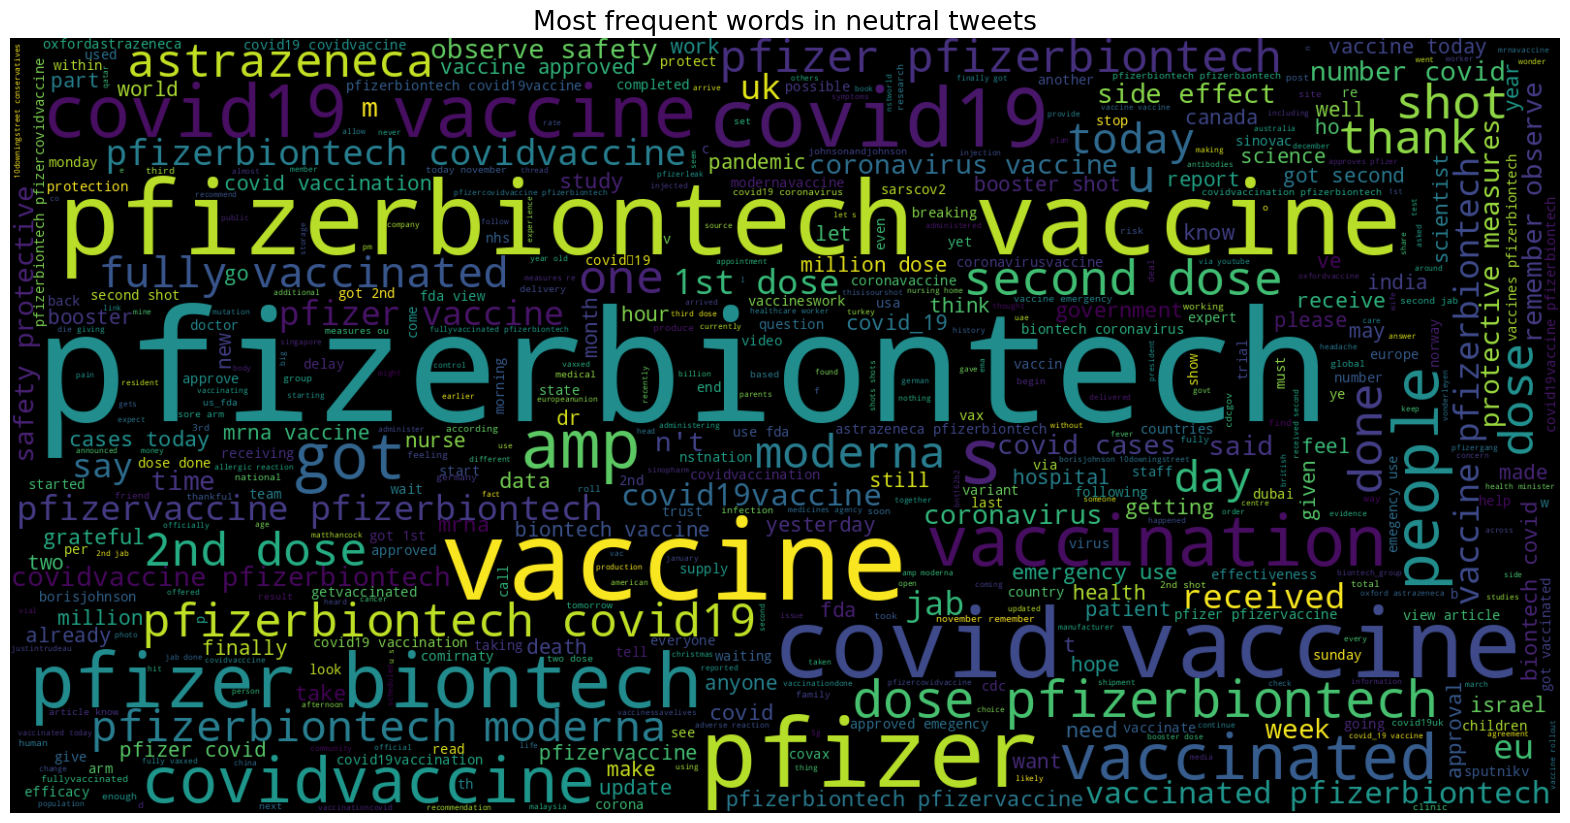

In [ ]:
# Assuming neu_tweets is your DataFrame or list containing neutral tweets
text = ' '.join([word for word in neu_tweets['text']])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

# **Thank You**